In [1]:
%tensorflow_version 1.x
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from collections import deque
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import adam
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
class DQN(object):

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1
        self.gamma = 1
        self.epsilon_min = .01
        self.epsilon_decay = .999
        self.learning_rate = 0.99
        self.batch_size = 32
        self.memory = deque(maxlen = 10000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(24, input_shape=(self.state_space,), activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss = 'mse', optimizer = adam(lr = 0.001))
        return model

    def remember(self, state, action, reward, next_state, done):

        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        self.epsilon = self.epsilon * self.epsilon_decay
        epsilon = max(self.epsilon_min, self.epsilon)

        if random.uniform(0, 1) <= epsilon:
            return env.action_space.sample()
        else:
            act_values = self.model.predict(state)
            return np.argmax(act_values[0])

    def replay(self, step):
      
        if len(self.memory) < self.batch_size:
            return

        random.seed(step)

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = (1 - self.learning_rate) * targets_full[[ind], [actions]] + self.learning_rate * targets 
        self.model.fit(states, targets_full, epochs=1, verbose=0)

    def total_energy(self, state):
        x = state[0, 0]
        v = state[0, 1]
        return 0.0025 / 3 * (math.sin(3 * x)) + 0.5 * (v * v)

In [0]:
def train_dqn(episode):
  
    global env
    loss = []
    agent = DQN(3, env.observation_space.shape[0])
    for e in range(episode):
        env = gym.make('MountainCar-v0')
        env.seed(episode)
        state = env.reset()
        state = np.reshape(state, (1, 2))
        score = 0
        max_steps = 1000
        for i in range(max_steps):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, (1, 2))
            score = score -1
            reward = 1000 * (agent.total_energy(next_state) - agent.total_energy(state)) 
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay(i)
            if state[0,0] >= 0.5:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        env.close()
        loss.append(score)
        if np.average(loss[-10:]) >= -110:
            break
    return loss

episode: 0/100, score: -713
episode: 1/100, score: -195
episode: 2/100, score: -209
episode: 3/100, score: -225
episode: 4/100, score: -208
episode: 5/100, score: -141
episode: 6/100, score: -124
episode: 7/100, score: -143
episode: 8/100, score: -143
episode: 9/100, score: -150
episode: 10/100, score: -116
episode: 11/100, score: -117
episode: 12/100, score: -114
episode: 13/100, score: -149
episode: 14/100, score: -118
episode: 15/100, score: -147
episode: 16/100, score: -145
episode: 17/100, score: -115
episode: 18/100, score: -111
episode: 19/100, score: -110
episode: 20/100, score: -109
episode: 21/100, score: -109
episode: 22/100, score: -110
episode: 23/100, score: -109
episode: 24/100, score: -109
episode: 25/100, score: -109
episode: 26/100, score: -105


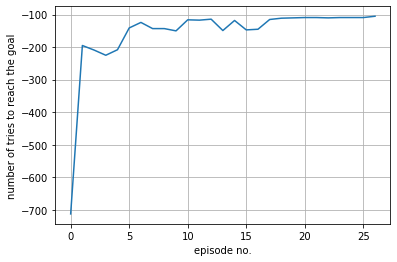

In [4]:
if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    ep = 100
    loss = train_dqn(ep)
    plt.plot(list(range(len(loss))), loss)
    plt.xlabel('episode no.')
    plt.ylabel('number of tries to reach the goal')
    plt.grid(True)
    plt.show()